<a href="https://colab.research.google.com/github/roronoazoro182/ML/blob/master/ML/ML_04_J053%3C7_7_20%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
!conda install -c anaconda xlrd --yes

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

/bin/bash: conda: command not found
Data read into a pandas dataframe!


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
#Preprocessing

df_can.drop(['AREA','Coverage','Type','REG','DEV'], axis='columns', inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Continent-Region','DevName':'Development-status'}, inplace=True)

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis='columns')

years = range(1980, 2014)

df_can.head()


,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dev_group = df_can.groupby('Development-status').sum()
print(dev_group)

                     1980   1981   1982   1983  ...    2011    2012    2013    Total
Development-status                              ...                                 
Developed regions   51143  56707  53240  32504  ...   36946   39682   39712  1714011
Developing regions  47994  53856  51031  43046  ...  209248  216540  217825  4695142

[2 rows x 35 columns]


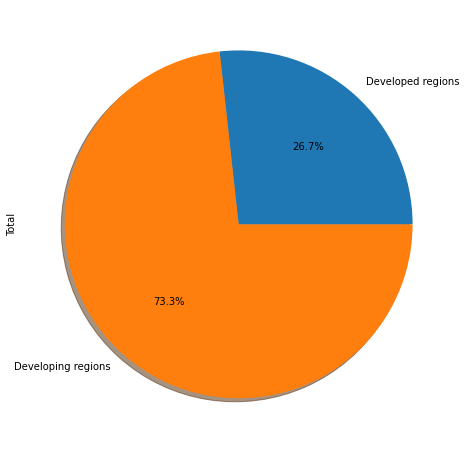

In [ ]:
dev_group['Total'].plot(kind='pie',figsize=(8,8),shadow=True,autopct='%0.1f%%')

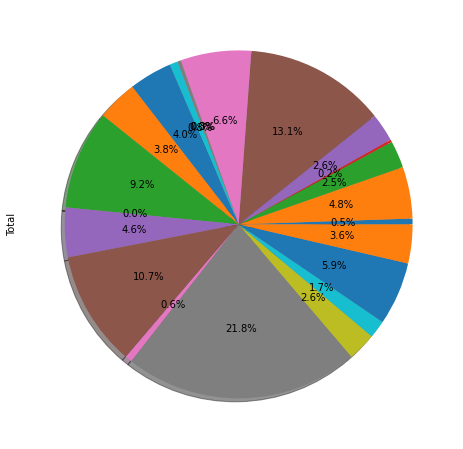

In [ ]:
df_cont_region = df_can.groupby('Continent-Region').sum()
df_cont_region['Total'].plot(kind='pie',figsize=(8,8),
    autopct='%1.1f%%',
    shadow=True,
    labels=None)
plt.show()

In [ ]:
dfip = df_can.loc[['India','Pakistan'],years].transpose()
dfip.index = pd.to_datetime(dfip.index)

In [ ]:
dfip.resample('Y')

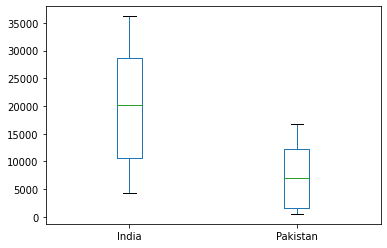

In [ ]:
df_india_pak = df_can.loc[['India','Pakistan'],years].transpose()
df_india_pak.plot(kind='box')
plt.show()

In [ ]:
top5 = df_can.sort_values(by='Total',ascending=False).head()
bot5 = df_can.sort_values(by='Total',ascending=False).tail()

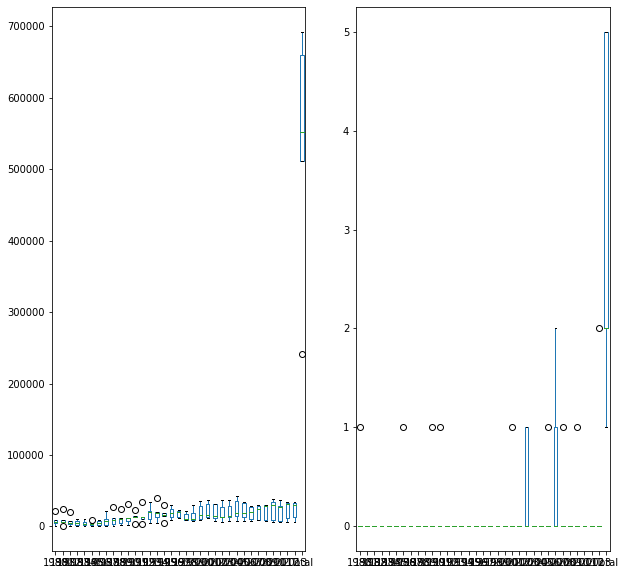

In [ ]:
fig,ax = plt.subplots(1,2)
top5.plot(kind='box',ax=ax[0],figsize=(10,10))
bot5.plot(kind='box',ax=ax[1],figsize=(10,10))
plt.show()

In [ ]:
top5_europe = df_can[df_can['Continent']=='Europe'].sort_values(by='Total',ascending=False).head()
top5_africa = df_can[df_can['Continent']=='Africa'].sort_values(by='Total',ascending=False).head()
top5_asia = df_can[df_can['Continent']=='Asia'].sort_values(by='Total',ascending=False).head()
top5_oceania = df_can[df_can['Continent']=='Oceania'].sort_values(by='Total',ascending=False).head()

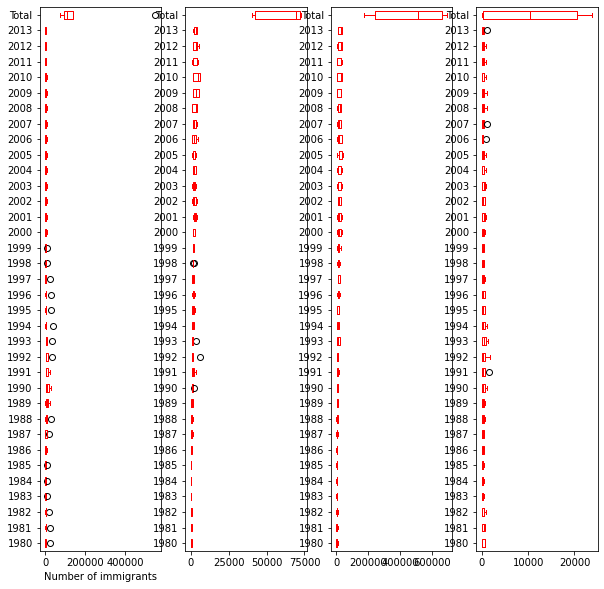

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)


top5_europe.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax0)
#ax0.set_title("Immigration from From top five countries to Canada 1980-2013")
ax0.set_xlabel("Number of immigrants")
ax0.set_ylabel("")

top5_africa.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax1)
#plt.title("Immigration from From top five countries to Canada 1980-2013")

top5_asia.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax2)
top5_oceania.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax3)


plt.show()

In [ ]:
df_can['Total'].describe()

count       195.000000
mean      32867.451282
std       91785.498686
min           1.000000
25%         952.000000
50%        5018.000000
75%       22239.500000
max      691904.000000
Name: Total, dtype: float64

In [ ]:
print(df_can[years].sum(axis='columns'))
print(df_can[years].sum(axis='rows'))


Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64
1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64


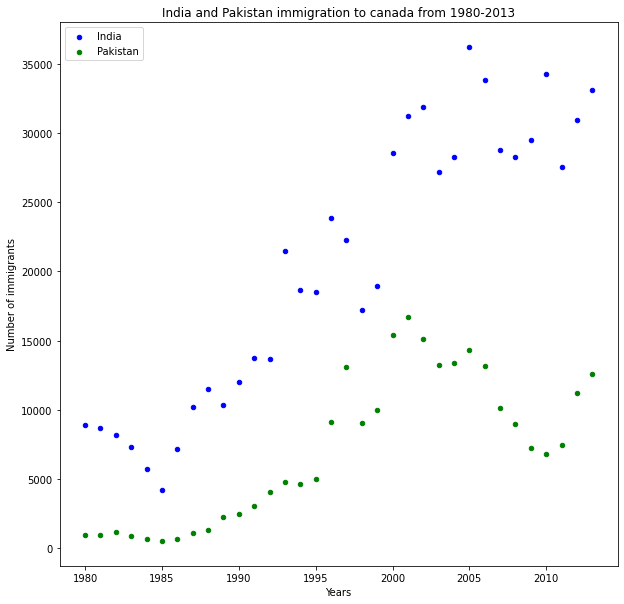

In [ ]:
dfindopak = df_can.loc[['India','Pakistan'], years].transpose()
dfindopak.reset_index(inplace=True)
#dfindopak.index.name = 'index'
dfindopak.rename(columns={'index':'Year'}, inplace=True)

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='blue'
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

In [ ]:
dfindopak

Country,Year,India,Pakistan
0,1980,8880,978
1,1981,8670,972
2,1982,8147,1201
3,1983,7338,900
4,1984,5704,668
5,1985,4211,514
6,1986,7150,691
7,1987,10189,1072
8,1988,11522,1334
9,1989,10343,2261


In [ ]:
dfnord = df_can.loc[['Norway','Finland','Denmark'], years].transpose()

normnorway = (dfindopak['Norway'] - dfindopak['Norway'].min()) / (dfindopak['Norway'].max() - dfindopak['Norway'].min())
normfinland = (dfindopak['Finland'] - dfindopak['Finland'].min()) / (dfindopak['Finland'].max() - dfindopak['Finland'].min())
normdenmark = (dfindopak['Denmark'] - dfindopak['Denmark'].min()) / (dfindopak['Denmark'].max() - dfindopak['Denmark'].min())


ax0 = dfnord.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='yellow',
    s = normnorway*200
)

ax1 = dfnord.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Finland',
    color='blue',
    ax=ax0,
    s = normfinland*200
)
ax2 = dfnord.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='red',
    ax=ax0,
    s = normdenmark*200
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')


KeyError: ignored

In [ ]:
dfnord

Country,Norway,Finland,Denmark
1980,116,208,272
1981,77,205,293
1982,106,170,299
1983,51,70,106
1984,31,83,93
1985,54,69,73
1986,56,68,93
1987,80,92,109
1988,73,89,129
1989,76,78,129
